In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
data = pd.read_csv("./Dataset/Customer-Churn-Prediction.csv")

In [113]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,Stayed
7039,7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,Stayed
7040,7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,Stayed
7041,7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Churned


In [5]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [6]:
data.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Churn
Stayed     5174
Churned    1869
Name: count, dtype: int64


Text(0, 0.5, 'Count')

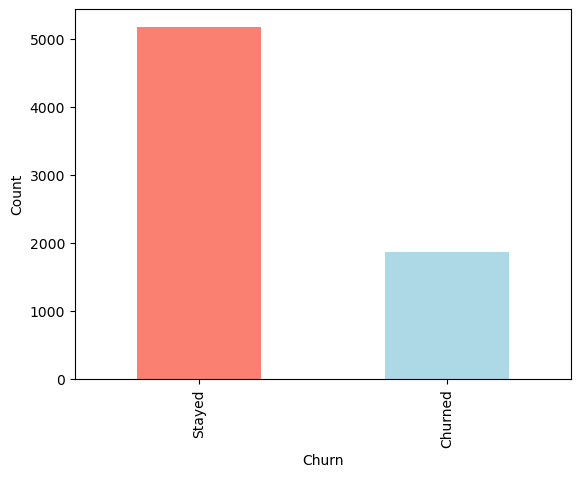

In [9]:
print(data.Churn.value_counts())
data.Churn.value_counts().plot(kind='bar', color=['salmon','lightblue'])
plt.ylabel('Count')

In [10]:
for col in data.columns:
    print('-------------------------------------------------------')
    print(f"Column {col} has {data[col].unique()} as unique values")
    print('-------------------------------------------------------')

-------------------------------------------------------
Column customerID has ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] as unique values
-------------------------------------------------------
-------------------------------------------------------
Column gender has ['Female' 'Male'] as unique values
-------------------------------------------------------
-------------------------------------------------------
Column SeniorCitizen has ['No' 'Yes'] as unique values
-------------------------------------------------------
-------------------------------------------------------
Column Partner has ['Yes' 'No'] as unique values
-------------------------------------------------------
-------------------------------------------------------
Column Dependents has ['No' 'Yes'] as unique values
-------------------------------------------------------
-------------------------------------------------------
Column tenure has [ 1 34  2 45  8 22 10 28 62 13 16

In [11]:
numerical_features = ['tenure', 'MonthlyCharges','TotalCharges']

In [12]:
print(data['TotalCharges'].dtype)
def convert_to_float(x):
    if(x == ''):
        return np.nan
    else:
        return np.float64(x)
data['TotalCharges'] = data['TotalCharges'].str.strip().apply(convert_to_float)

object


In [13]:
data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


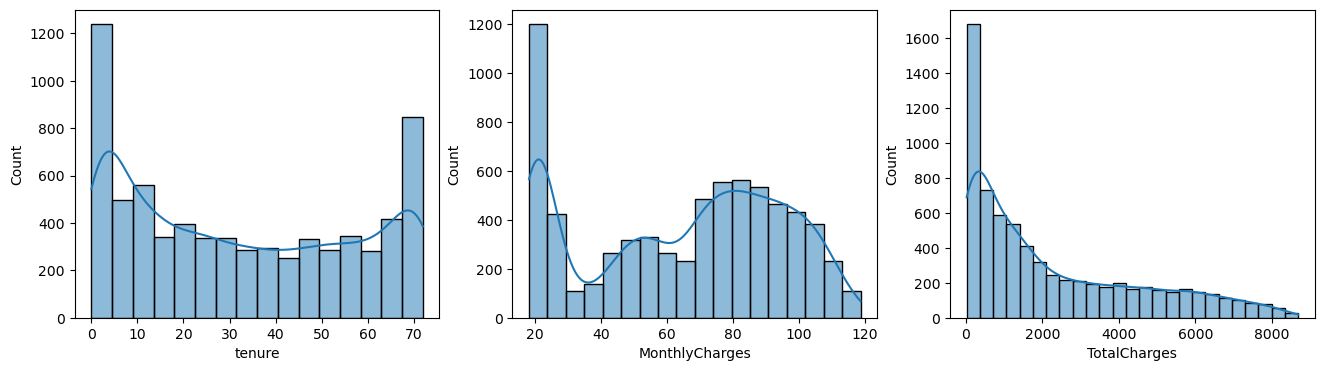

In [14]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
for ax, category in zip(axes.flatten(), numerical_features):
    sns.histplot(data[category],kde=True, ax=ax)

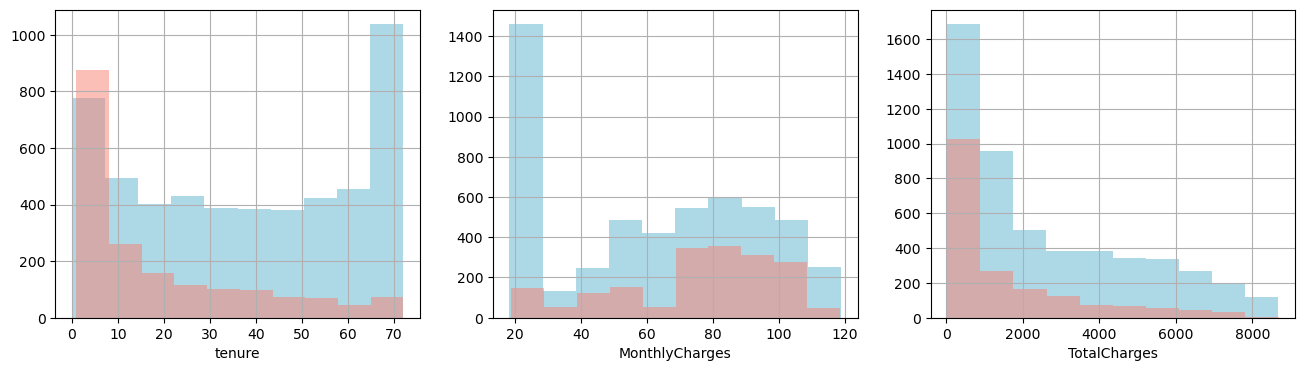

In [106]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
for ax, category in zip(axes.flatten(), numerical_features):
    data[data.Churn==1][category].hist(bins=10, color='lightblue', ax=ax)
    data[data.Churn==0][category].hist(bins=10, color='salmon', alpha=0.5, ax=ax)
    ax.set_xlabel(category)

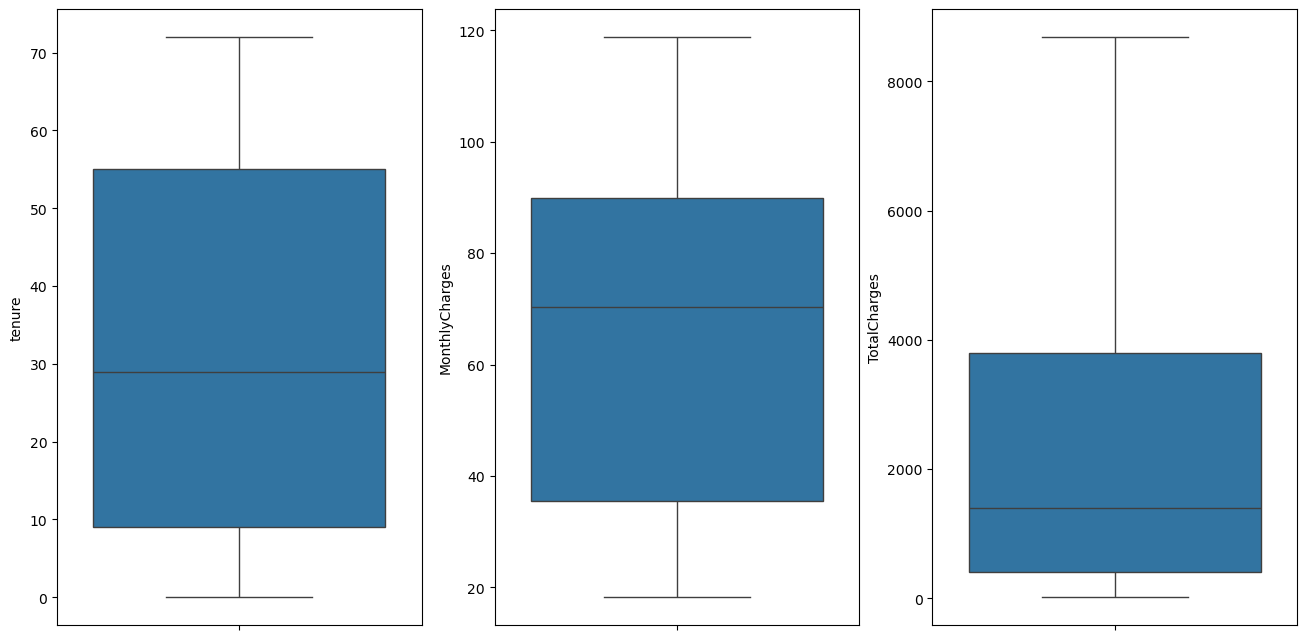

In [16]:
fig, axes = plt.subplots(1,3, figsize=(16,8))
for ax, category in zip(axes.flatten(), numerical_features):
    sns.boxplot(data[category], ax=ax)

In [17]:
def remove_str(x):
    if(x == 'dsl'):
        return 'DSL'
    else:
        return x
data['InternetService'] = data['InternetService'].apply(remove_str)

In [18]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
data['SeniorCitizen'] = data['SeniorCitizen'].replace(['Yes','No'],[1,0])
data['Partner'] = data['Partner'].replace(['Yes','No'],[1,0])
data['Dependents'] = data['Dependents'].replace(['Yes','No'],[1,0])
data['PhoneService'] = data['PhoneService'].replace(['Yes','No'],[1,0])
data['PaperlessBilling'] = data['PaperlessBilling'].replace(['Yes','No'],[1,0])
data['Churn'] = data['Churn'].replace(['Stayed','Churned'],[1,0])
data['MultipleLines'] = data['MultipleLines'].replace(['Yes','No','No phone service'],[2,1,0])

data['InternetService'] = data['InternetService'].replace(['Fiber optic','DSL','No'],[2,1,0])


data['OnlineSecurity'] = data['OnlineSecurity'].replace(['Yes','No','No internet service'],[2,1,0])
data['OnlineBackup'] = data['OnlineBackup'].replace(['Yes','No','No internet service'],[2,1,0])
data['DeviceProtection'] = data['DeviceProtection'].replace(['Yes','No','No internet service'],[2,1,0])
data['TechSupport'] = data['TechSupport'].replace(['Yes','No','No internet service'],[2,1,0])
data['StreamingTV'] = data['StreamingTV'].replace(['Yes','No','No internet service'],[2,1,0])
data['Contract'] = data['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2])
data['PaymentMethod'] = data['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[1,2,3,4])
data['StreamingMovies'] = data['StreamingMovies'].replace(['Yes','No','No internet service'],[2,1,0])

In [20]:
# Label Encoding may intreoduce bias by giving undue weight to one gender with more value 
# https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['gender']])

# Convert the result to a pandas DataFrame for better readability
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['gender']))
encoded_df

,gender_Female,gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
7038,0.0,1.0
7039,1.0,0.0
7040,1.0,0.0
7041,0.0,1.0


In [21]:
data2 = pd.concat([encoded_df, data], axis=1)

In [22]:
data2.drop(['gender', 'customerID'], axis=1, inplace=True)

In [23]:
data2

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,1,29.85,29.85,1
1,0.0,1.0,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,2,56.95,1889.50,1
2,0.0,1.0,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,2,53.85,108.15,0
3,0.0,1.0,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,3,42.30,1840.75,1
4,1.0,0.0,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0,1,1,24,1,2,1,2,...,2,2,2,2,1,1,2,84.80,1990.50,1
7039,1.0,0.0,0,1,1,72,1,2,2,1,...,2,1,2,2,1,1,4,103.20,7362.90,1
7040,1.0,0.0,0,1,1,11,0,0,1,2,...,1,1,1,1,0,1,1,29.60,346.45,1
7041,0.0,1.0,1,1,0,4,1,2,2,1,...,1,1,1,1,0,1,2,74.40,306.60,0


In [24]:
data2

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,1,29.85,29.85,1
1,0.0,1.0,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,2,56.95,1889.50,1
2,0.0,1.0,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,2,53.85,108.15,0
3,0.0,1.0,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,3,42.30,1840.75,1
4,1.0,0.0,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0,1,1,24,1,2,1,2,...,2,2,2,2,1,1,2,84.80,1990.50,1
7039,1.0,0.0,0,1,1,72,1,2,2,1,...,2,1,2,2,1,1,4,103.20,7362.90,1
7040,1.0,0.0,0,1,1,11,0,0,1,2,...,1,1,1,1,0,1,1,29.60,346.45,1
7041,0.0,1.0,1,1,0,4,1,2,2,1,...,1,1,1,1,0,1,2,74.40,306.60,0


In [25]:
data2.dtypes

gender_Female       float64
gender_Male         float64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
data2['InternetService'].unique()

array([1, 2, 0], dtype=int64)

In [27]:
data2.isna().sum()

gender_Female        0
gender_Male          0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
data2.dropna(inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [72]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

In [31]:
y = data2['Churn']
X = data2.drop('Churn', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [66]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.80668088 0.80597015 0.7859175  0.80512091 0.79658606]
0.80 accuracy with a standard deviation of 0.01


In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62       411
           1       0.83      0.91      0.87       996

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407



In [91]:
param_grid = {
        'penalty' : ['l1', 'l2','elasticnet','none'],
         'max_iter' : [100,1000,2000],
        'C' : np.logspace(-4,4,5),
    'solver': ['lbfgs','liblinear','sag','saga'],
        
    }

In [94]:
clf = GridSearchCV(log_reg,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'max_iter': [100, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=True)

In [95]:
best_log_reg = clf.fit(X, y)
print(best_log_reg.best_estimator_)
print(f'Accuracy - : {best_log_reg.score(X_test,y_test):.3f}')

Fitting 3 folds for each of 240 candidates, totalling 720 fits
LogisticRegression(C=10000.0, max_iter=1000)
Accuracy - : 0.810


In [97]:
log_reg = LogisticRegression(C=10000, max_iter=1000)

In [101]:
ada_model = AdaBoostClassifier(base_estimator=log_reg, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters", best_params)

Best parameters {'learning_rate': 0.1, 'n_estimators': 50}


In [103]:
# Train the model with the best parameters
best_ada_model = AdaBoostClassifier(estimator=log_reg, random_state=42, **best_params)
best_ada_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       411
           1       0.83      0.92      0.87       996

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407



In [65]:
scores = cross_val_score(CategoricalNB(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.nanmean(np.array(scores)), np.nanstd(np.array(scores))))

[0.73631841 0.73631841 0.71123755        nan 0.71550498]
0.72 accuracy with a standard deviation of 0.01


In [34]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64       411
           1       0.89      0.72      0.80       996

    accuracy                           0.74      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.79      0.74      0.75      1407



In [64]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.nanmean(np.array(scores)), np.nanstd(np.array(scores))))

[0.73347548 0.73916134 0.72475107 0.72972973 0.73826458]
0.73 accuracy with a standard deviation of 0.01


In [35]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       411
           1       0.81      0.80      0.80       996

    accuracy                           0.72      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.72      0.72      0.72      1407



In [67]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.nanmean(np.array(scores)), np.nanstd(np.array(scores))))

[0.74982232 0.76759062 0.75320057 0.75391181 0.77027027]
0.76 accuracy with a standard deviation of 0.01


In [36]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       411
           1       0.80      0.89      0.85       996

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [68]:
scores = cross_val_score(SVC(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.nanmean(np.array(scores)), np.nanstd(np.array(scores))))

[0.73418621 0.73418621 0.73470839 0.73399716 0.73399716]
0.73 accuracy with a standard deviation of 0.00


In [105]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       411
           1       0.71      1.00      0.83       996

    accuracy                           0.71      1407
   macro avg       0.35      0.50      0.41      1407
weighted avg       0.50      0.71      0.59      1407



In [69]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (np.nanmean(np.array(scores)), np.nanstd(np.array(scores))))

[0.79317697 0.78464819 0.76173542 0.8086771  0.79658606]
0.79 accuracy with a standard deviation of 0.02


In [38]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       411
           1       0.81      0.91      0.86       996

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# Define the base Random Forest classifier
base_rf = RandomForestClassifier(random_state=42)

# Define the AdaBoost classifier with the Random Forest as the base estimator
adaboost_rf = AdaBoostClassifier(base_estimator=base_rf, random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__n_estimators': [100, 200], # Hyperparameters for the base Random Forest
    'base_estimator__max_depth': [5, 10],
    'base_estimator__min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(adaboost_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)